# All Campuses & Years - Data Wrangling
_**Campuses**: Madrid, Paris, Barcelona, Miami, Mexico, São Paulo, Berlin, Remote, Amsterdam and Lisbon.
**Years**: 2016-2021_

Data Wrangling is the process of cleaning, structuring and enriching raw data into a desired format for better decision making in less time.

- [Environment](#Environment)


- [Data Wrangling](#DataWrangling)
    - [Explore Data](#ExploreData)
    - [Clean Data](#CleanData)
    - [Remove Useless Columns](#RemoveColumns)
    - [Add New Columns](#AddColumns)


- [Clean CSV](#CleanCSV)


- [Main Insigths](#Insights)

## Environment

#### import libraries

In [28]:
# Pandas and Numpy
import pandas as pd
import numpy as np

#Time 
import time
from datetime import datetime
import datetime as dt

# Maths
import math
from scipy import stats

#Transform
from sklearn.preprocessing import OneHotEncoder

# Visualization
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### import data

In [15]:
apps = pd.read_csv("../apps_ih_extended.csv", sep=";",low_memory=False) 

In [8]:
#this column is "commented" as confidential data (names of students) can't be seen 
#apps.head()

## ExploreData

#### Metadata

- bootcamp_course: course associated to the opportunity, either WD, UX or DA.
- bootcamp_format: format associated to the opportunity, either FT or PT.
- bootcamp_start_date: Start Date of the course associated to thez opportunity.
- stage: The stage name the application lives at that moment.
- lost_deal_reason: Reason why the applicant has dropped the admission process
- stage_before_lost: The stage where the opportunity is before getting lost
- created_date: Date and time when this record was created. 
- close_date: Date when the opportunity is expected to close (before closing) or closed.
- drop_reason: Reason why the applicant has dropped after paying his deposit
- net_amount: Amount minus Discount or Scholarship Amount
- discount_type: Type of the discount, either Scholarship or Discount
- discount_name: Name of the discount initiative associated to the opportunity
- discount_amount: Amount of the discount that the applicant received
- scholarship_name: Name of the scholarship initiative associated to the opportunity
- scholarship_amount: Amount of the scholarship discount given to the opportunity
- financing_options: name of the financing option
- financing_option_amount: amount in local currency of the financing option
- deposit_payment: The amount of the tuition neither the student or Ironhack paid
- Stage Duration: The number of days the opportunity was in the stage listed in the Stage column
- ...

#### All variables info

In [16]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40228 entries, 0 to 40227
Data columns (total 58 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Opportunity ID                            40228 non-null  object 
 1   Opportunity Name                          40145 non-null  object 
 2   Has Courses                               40228 non-null  int64  
 3   Bootcamp Course                           36637 non-null  object 
 4   Bootcamp Format                           36635 non-null  object 
 5   Bootcamp Year                             36674 non-null  float64
 6   Bootcamp Start Date                       36674 non-null  object 
 7   Campus                                    39942 non-null  object 
 8   Campus - Timezone                         39942 non-null  object 
 9   Created Date                              40228 non-null  object 
 10  Close Date                        

In [17]:
apps.columns

Index(['Opportunity ID', 'Opportunity Name', 'Has Courses', 'Bootcamp Course',
       'Bootcamp Format', 'Bootcamp Year', 'Bootcamp Start Date', 'Campus',
       'Campus - Timezone', 'Created Date', 'Close Date', 'Invoice Date',
       'Stage', 'Discount Amount (converted) Currency',
       'Discount Amount (converted)',
       'Scholarship Amount (converted) Currency',
       'Scholarship Amount (converted)', 'Amount (converted) Currency',
       'Amount (converted)', 'Net Amount With VAT (converted) Currency',
       'Net Amount With VAT (converted)', 'Drop', 'Drop Reason',
       'Lost Deal Reason', 'Stage Before Lost', 'how did you hear about us?',
       'Person Account: Tech Background', 'Person Account: Gender',
       'Person Account: Highest degree received',
       'Person Account: Type of Position', 'Person Account: Looking for a Job',
       'Person Account: Nationality', 'Last Modified Date',
       'All Traffic Sources', 'First Click Medium', 'First Click Source',
       

In [18]:
apps.shape

(40228, 58)

In [19]:
apps.describe()

,Has Courses,Bootcamp Year,Drop,Inactive Days,Person Account: Company Located in,Programming languages
count,40228.000000,36674.000000,40228.000000,7315.000000,0.0,0.0
mean,0.910386,2018.957109,0.010391,66.009296,NaN,NaN
std,0.285632,3.016283,0.101405,53.712602,NaN,NaN
min,0.000000,1900.000000,0.000000,0.000000,NaN,NaN
25%,1.000000,2018.000000,0.000000,27.000000,NaN,NaN
50%,1.000000,2019.000000,0.000000,56.000000,NaN,NaN
75%,1.000000,2020.000000,0.000000,95.000000,NaN,NaN
max,1.000000,2021.000000,1.000000,392.000000,NaN,NaN


#### Numeric Variables

In [20]:
numeric= apps.select_dtypes(include=np.number)
numeric

,Has Courses,Bootcamp Year,Drop,Inactive Days,Person Account: Company Located in,Programming languages
0,0,NaN,0,NaN,NaN,NaN
1,1,2018.0,0,NaN,NaN,NaN
2,1,2019.0,0,NaN,NaN,NaN
3,1,2020.0,0,NaN,NaN,NaN
4,1,2018.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...
40223,1,2020.0,0,25.0,NaN,NaN
40224,1,2020.0,0,71.0,NaN,NaN
40225,0,NaN,0,NaN,NaN,NaN
40226,1,2020.0,0,153.0,NaN,NaN


#### Categorical Variables

In [21]:
categoric= apps.select_dtypes(exclude=np.number)

#### Nan values

In [22]:
apps.isnull().sum()

Opportunity ID                                  0
Opportunity Name                               83
Has Courses                                     0
Bootcamp Course                              3591
Bootcamp Format                              3593
Bootcamp Year                                3554
Bootcamp Start Date                          3554
Campus                                        286
Campus - Timezone                             286
Created Date                                    0
Close Date                                      0
Invoice Date                                37447
Stage                                           0
Discount Amount (converted) Currency        19739
Discount Amount (converted)                 19739
Scholarship Amount (converted) Currency     40118
Scholarship Amount (converted)              40118
Amount (converted) Currency                  3365
Amount (converted)                           3365
Net Amount With VAT (converted) Currency        0


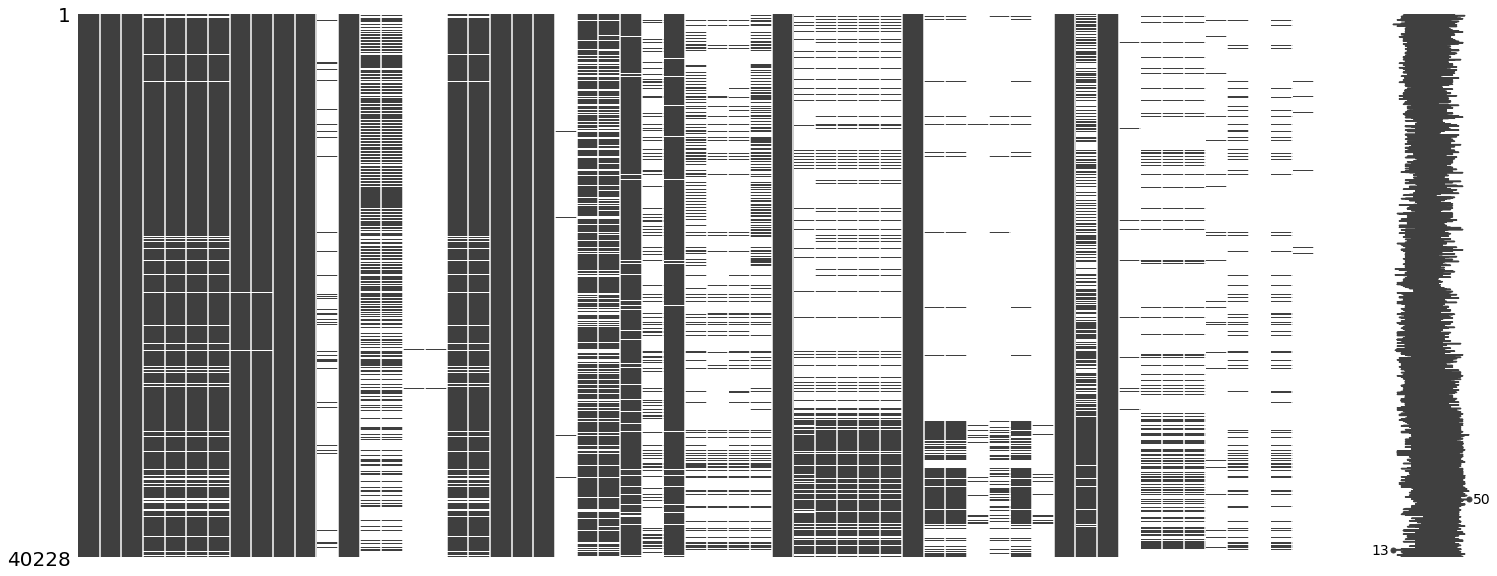

In [27]:
msno.matrix(apps);

In [11]:
total_values_xCol= apps.count()+apps.isnull().sum()

In [12]:
total_values= total_values_xCol.sum()

In [13]:
total_ExValues=apps.count().sum()

In [14]:
total_NanValues=apps.isnull().sum().sum()

In [15]:
print(round(total_NanValues/total_values*100,2),"% of our data is null")
print("*Taking into account all IH organic apps (40228) and the 58 columns from IH that refers to the user and its moves during the Admissions Process")


48.89 % of our data is null
*Taking into account all IH organic apps (40228) and the 58 columns from IH that refers to the user and its moves during the Admissions Process


## CleanData

#### Column: Opportunity Name

This column will not give us any value, as it is not important the name of the person who enrols. But, we will wait to remove it as it can be usefull to complete other columns with its information. Only Nans will be remove now as those are the ones that do not correspont to a real applicant.

In [16]:
apps.drop(apps[apps["Opportunity Name"].isnull()==True].index, inplace=True)                                 

#### Column: Has Courses

In [17]:
apps["Has Courses"].value_counts()

1    36541
0     3604
Name: Has Courses, dtype: int64

We will remove the application without course as it was from a test campaign that was on for a few month and paused from november 2020, and in this project we'd like to predict the random organic applicaiton.

Applicants without course correspond to 1% of our dataset

In [18]:
apps.drop(apps[apps["Has Courses"]==0].index, inplace=True)                                 

#### Column: Bootcamp Course

In [19]:
apps["Bootcamp Course"].isnull().sum()

27

In [20]:
apps["Bootcamp Course"].value_counts()

WD     21319
UX      8586
DA      6189
CY       401
ios       19
Name: Bootcamp Course, dtype: int64

In [7]:
#this column is "commented" as confidential data can't be seen 
#apps[apps["Bootcamp Course"].isnull()==True]

As we could see, applicants without Bootcamp Course lack of most of their information. Most of those applicants correspond to Madrid and Sao Paulo campus.

We decide to remove those 27 rows.

In [22]:
apps.drop(apps[apps["Bootcamp Course"].isnull()==True].index, inplace=True)                                 

#### Column: Bootcamp Format

In [23]:
apps["Bootcamp Format"].isnull().sum()

2

In [24]:
apps["Bootcamp Format"].value_counts()

FT    28054
PT     8458
Name: Bootcamp Format, dtype: int64

In [13]:
#this column is "commented" as confidential data (names of students) can't be seen 

#apps[apps["Bootcamp Format"].isnull()==True]

In [26]:
apps["Bootcamp Format"].fillna("FT", inplace = True) 

#### Column: Bootcamp Year

In [27]:
apps["Bootcamp Year"].value_counts()

2020.0    13576
2019.0     9700
2018.0     6295
2021.0     2863
2017.0     2853
2016.0     1124
1970.0      101
1900.0        2
Name: Bootcamp Year, dtype: int64

In [28]:
apps["Bootcamp Year"].dtype

dtype('float64')

In [29]:
apps["Bootcamp Year"]=apps["Bootcamp Year"].astype(int)

In [12]:
#this column is "commented" as confidential data (names of students) can't be seen 
#apps[apps["Bootcamp Year"]==1970]

In [31]:
apps["Bootcamp Year"][apps["Bootcamp Year"]==1970]= apps["Created Date"].apply(lambda x: int(x[-4:]))
apps["Bootcamp Year"][apps["Bootcamp Year"]==1900]= apps["Created Date"].apply(lambda x: int(x[-4:]))

<ipython-input-31-d301c934db1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps["Bootcamp Year"][apps["Bootcamp Year"]==1970]= apps["Created Date"].apply(lambda x: int(x[-4:]))
<ipython-input-31-d301c934db1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps["Bootcamp Year"][apps["Bootcamp Year"]==1900]= apps["Created Date"].apply(lambda x: int(x[-4:]))


In [32]:
apps["Bootcamp Year"].value_counts()

2020    13577
2019     9701
2018     6295
2021     2863
2017     2856
2016     1222
Name: Bootcamp Year, dtype: int64

In [33]:
apps["Bootcamp Year"].isnull().sum()

0

#### Column: Bootcamp Start Date

In [34]:
apps["Bootcamp Start Date"].value_counts()

11/01/2021    1545
23/03/2020    1442
19/10/2020    1329
21/10/2019    1165
1/06/2020      833
              ... 
19/02/2019       1
17/07/2017       1
11/10/2016       1
3/04/2018        1
20/09/2021       1
Name: Bootcamp Start Date, Length: 298, dtype: int64

In [35]:
apps["Bootcamp Start Date"].isnull().sum()

0

In [36]:
apps["Bootcamp Start Date"]= pd.to_datetime(apps["Bootcamp Start Date"])

#### Column: Campus

In [37]:
apps["Campus"].value_counts()

Madrid       5856
Paris        5654
Barcelona    4920
Miami        4647
Mexico       3970
São Paulo    3089
Berlin       2801
Remote       2385
Amsterdam    1684
Lisbon       1361
Bogota        125
Munich         11
Name: Campus, dtype: int64

In [38]:
apps["Campus"].isnull().sum()

11

In [11]:
#this column is "commented" as confidential data (names of students) can't be seen 
#apps[apps["Campus"].isnull()==True]

we'll drop for now all applicants without campus as some are missing too much info and others are dupplicates.

In [40]:
apps.drop(apps[apps["Campus"].isnull()==True].index, inplace=True)                                 

Also, we'll drop applicants from Bogota & Munich since finally those campus were not open

In [41]:
apps.drop(apps[(apps["Campus"]=="Bogota") | (apps["Campus"]=="Munich")].index, inplace=True)        

In [42]:
apps["Campus"].value_counts()

Madrid       5856
Paris        5654
Barcelona    4920
Miami        4647
Mexico       3970
São Paulo    3089
Berlin       2801
Remote       2385
Amsterdam    1684
Lisbon       1361
Name: Campus, dtype: int64

#### Column: Campus - Timezone

In [43]:
apps["Campus - Timezone"].value_counts()

MAD                        5856
PAR                        5654
BCN                        4920
MIA                        4647
MEX                        3970
SAO                        3089
BER                        2801
RMT-Europe/Madrid          1795
AMS                        1684
LIS                        1361
RMT-America/Mexico_City     256
RMT-America/Sao_Paulo       163
RMT-America/Chicago         124
RMT-                         47
Name: Campus - Timezone, dtype: int64

*We undesrtand that RMT- is RMT-Europe/Madrid 

In [44]:
apps["Campus - Timezone"][apps["Campus - Timezone"]=="RMT-"]="RMT-Europe/Madrid"

<ipython-input-44-3fe39a5f7f1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps["Campus - Timezone"][apps["Campus - Timezone"]=="RMT-"]="RMT-Europe/Madrid"


In [45]:
apps["Campus - Timezone"][(apps["Campus - Timezone"]=="RMT-America/Chicago")|(apps["Campus - Timezone"]=="RMT-America/Sao_Paulo")| (apps["Campus - Timezone"]=="RMT-America/Mexico_City")]="RMT-America"


<ipython-input-45-654e0e32cc4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps["Campus - Timezone"][(apps["Campus - Timezone"]=="RMT-America/Chicago")|(apps["Campus - Timezone"]=="RMT-America/Sao_Paulo")| (apps["Campus - Timezone"]=="RMT-America/Mexico_City")]="RMT-America"


In [46]:
apps["Campus - Timezone"][apps["Campus - Timezone"]=="RMT-Europe/Madrid"]="RMT-Europe"

<ipython-input-46-9c07bd77bed1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps["Campus - Timezone"][apps["Campus - Timezone"]=="RMT-Europe/Madrid"]="RMT-Europe"


In [47]:
apps["Campus - Timezone"].isnull().sum()

0

In [48]:
apps["Campus - Timezone"].value_counts()

MAD            5856
PAR            5654
BCN            4920
MIA            4647
MEX            3970
SAO            3089
BER            2801
RMT-Europe     1842
AMS            1684
LIS            1361
RMT-America     543
Name: Campus - Timezone, dtype: int64

#### Column: Created Date, Closed Date, Bootcamp Start Date and Last Modified Date

Fix same datetime format for all column dates

In [49]:
apps["Created Date"]= pd.to_datetime(apps["Created Date"])
apps["Close Date"]= pd.to_datetime(apps["Close Date"])
apps["Bootcamp Start Date"]= pd.to_datetime(apps["Bootcamp Start Date"])
apps["Invoice Date"]= pd.to_datetime(apps["Invoice Date"])
apps["Last Modified Date"]= pd.to_datetime(apps["Last Modified Date"])

Make sure all "Created dates" are < "Close Month", "Close Date".

In [50]:
print("Total rows with Close, Created Date, Invoice Date:")
apps[["Close Date","Created Date","Invoice Date"]].count()

Total rows with Close, Created Date, Invoice Date:


Close Date      36367
Created Date    36367
Invoice Date     2781
dtype: int64

In [51]:
print("Rows that have correct dates (Created Date<Close Date):")
apps[["Close Date","Created Date","Invoice Date"]][(apps["Created Date"]<apps["Close Date"])].count()

Rows that have correct dates (Created Date<Close Date):


Close Date      27206
Created Date    27206
Invoice Date     2042
dtype: int64

In [52]:
print("Rows that have wrong dates (Created Date>Close Date):")
apps[["Close Date","Created Date", "Invoice Date"]][(apps["Created Date"]>apps["Close Date"])].count()

Rows that have wrong dates (Created Date>Close Date):


Close Date      7570
Created Date    7570
Invoice Date     703
dtype: int64

In [53]:
print("Rows/Campus that have wrong dates (Created Date>Close Date):")

print("São Paulo:",apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Campus"]=="São Paulo")].count())
print("Paris:",apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Campus"]=="Paris")].count())
print("Barcelona:",apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Campus"]=="Barcelona")].count())
print("Miami:",apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Campus"]=="Miami")].count())
print("Mexico:",apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Campus"]=="Mexico")].count())
print("Madrid:",apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Campus"]=="Madrid")].count())
print("Berlin:",apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Campus"]=="Berlin")].count())
print("Amsterdam:",apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Campus"]=="Amsterdam")].count())
print("Remote:",apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Campus"]=="Remote")].count())
print("Lisbon:",apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Campus"]=="Lisbon")].count())



Rows/Campus that have wrong dates (Created Date>Close Date):
São Paulo: 481
Paris: 1303
Barcelona: 1038
Miami: 1157
Mexico: 877
Madrid: 1223
Berlin: 610
Amsterdam: 355
Remote: 288
Lisbon: 238


In [54]:
print("Rows/Stage that have wrong dates (Created Date>Close Date):")

print("Closed lost:",apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Stage"]=="Closed lost")].count())
print("Paid Deposit:",apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Stage"]=="Paid Deposit")].count())
print("Technical Interview:",apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Stage"]=="Technical Interview")].count())
print("Qualification:",apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Stage"]=="Qualification")].count())
print("Applied:",apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Stage"]=="Applied")].count())
print("Personal Interview:",apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Stage"]=="Personal Interview")].count())
print("Student Agreement:",apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Stage"]=="Student Agreement")].count())
print("ISA won on account:",apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Stage"]=="ISA won on account")].count())


Rows/Stage that have wrong dates (Created Date>Close Date):
Closed lost: 5513
Paid Deposit: 2028
Technical Interview: 2
Qualification: 6
Applied: 4
Personal Interview: 5
Student Agreement: 6
ISA won on account: 6


In [55]:
print("Rows/Format that have wrong dates (Created Date>Close Date):")

print("FT:",apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Bootcamp Format"]=="FT")].count())
print("PT:",apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Bootcamp Format"]=="PT")].count())

Rows/Format that have wrong dates (Created Date>Close Date):
FT: 5809
PT: 1761


In [56]:
print("Rows/Course that have wrong dates (Created Date>Close Date):")

print("WD:",apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Bootcamp Course"]=="WD")].count())
print("UX:",apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Bootcamp Course"]=="UX")].count())
print("CY:",apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Bootcamp Course"]=="CY")].count())
print("ios:",apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Bootcamp Course"]=="ios")].count())

Rows/Course that have wrong dates (Created Date>Close Date):
WD: 4610
UX: 1800
CY: 7
ios: 3


In [57]:
print("Rows/Year that have wrong dates (Created Date>Close Date):")

print("2021:",apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Bootcamp Year"]==2021)].count())
print("2020:",apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Bootcamp Year"]==2020)].count())
print("2019:",apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Bootcamp Year"]==2019)].count())
print("2018:",apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Bootcamp Year"]==2018)].count())
print("2017:",apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Bootcamp Year"]==2017)].count())
print("2016:",apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Bootcamp Year"]==2016)].count())

Rows/Year that have wrong dates (Created Date>Close Date):
2021: 178
2020: 2480
2019: 2348
2018: 1644
2017: 706
2016: 214


In [58]:
print("Total Rows/Year:")

print("2021:",apps["Campus"][(apps["Bootcamp Year"]==2021)].count())
print("2020:",apps["Campus"][(apps["Bootcamp Year"]==2020)].count())
print("2019:",apps["Campus"][(apps["Bootcamp Year"]==2019)].count())
print("2018:",apps["Campus"][(apps["Bootcamp Year"]==2018)].count())
print("2017:",apps["Campus"][(apps["Bootcamp Year"]==2017)].count())
print("2016:",apps["Campus"][(apps["Bootcamp Year"]==2016)].count())

Total Rows/Year:
2021: 2863
2020: 13577
2019: 9556
2018: 6293
2017: 2856
2016: 1222


In [59]:
y2021 =apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Bootcamp Year"]==2021)].count()
y2020=apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Bootcamp Year"]==2020)].count()
y2019=apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Bootcamp Year"]==2019)].count()
y2018=apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Bootcamp Year"]==2018)].count()
y2017=apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Bootcamp Year"]==2017)].count()
y2016=apps["Campus"][(apps["Created Date"]>apps["Close Date"])&(apps["Bootcamp Year"]==2016)].count()

In [60]:
ty2021 =apps["Campus"][(apps["Bootcamp Year"]==2021)].count()
ty2020=apps["Campus"][(apps["Bootcamp Year"]==2020)].count()
ty2019=apps["Campus"][(apps["Bootcamp Year"]==2019)].count()
ty2018=apps["Campus"][(apps["Bootcamp Year"]==2018)].count()
ty2017=apps["Campus"][(apps["Bootcamp Year"]==2017)].count()
ty2016=apps["Campus"][(apps["Bootcamp Year"]==2016)].count()

In [61]:
print("% of wrong Rows/Year:")

print("2021:",round(y2021/ty2021,2))
print("2020:",round(y2020/ty2020,2))
print("2019:",round(y2019/ty2019,2))
print("2018:",round(y2018/ty2018,2))
print("2017:",round(y2017/ty2017,2))
print("2016:",round(y2016/ty2016,2))

% of wrong Rows/Year:
2021: 0.06
2020: 0.18
2019: 0.25
2018: 0.26
2017: 0.25
2016: 0.18


As we could see, between 20%-30% of the data/year comes without a correct closed date. In order to decide if we could remove it or nor, we decided to check how balanced was the wrong data distributed to make sure that if we remove it it won't affect. And, we can see that among bootcamp types, formats, years and campus was balance, no wrong data was specificly comming from a place.


Nevertheless, since we have 706 invoice dates that could substitute the close dates, we will proceed to at least modifly this data and rise our target(y) data. This will help our model as so far our x and y are unbalanced.

In [62]:
apps["Close Date"]= np.where(apps["Invoice Date"].isnull()==False,apps["Invoice Date"], apps["Close Date"])

In [63]:
apps[["Close Date","Created Date","Invoice Date"]][(apps["Created Date"]<apps["Close Date"])].count()

Close Date      27179
Created Date    27179
Invoice Date     2015
dtype: int64

In [64]:
apps[["Close Date","Created Date", "Invoice Date"]][(apps["Created Date"]>apps["Close Date"])].count()

Close Date      7556
Created Date    7556
Invoice Date     689
dtype: int64

Finally we see that only 15 rows can be subtitute as only 15 invoice dates are < Created Date. Not much of a big add.

Now, we proceed by removeing those rows that still have a wrong Close Date

In [65]:
apps.drop(apps[apps["Created Date"]>apps["Close Date"]].index, inplace=True)

#### Column: Invoice Date

In [66]:
apps["Invoice Date"].isnull().sum()

26719

We check if all applicants without Invoice date is because they are not in the Paid Deposit Stage

In [67]:
apps[["Invoice Date","Stage","Close Date","Created Date"]][(apps["Invoice Date"].isnull()==True) & (apps["Stage"]=="Paid Deposit")]


,Invoice Date,Stage,Close Date,Created Date
28,NaT,Paid Deposit,2019-06-29,2019-05-29
37,NaT,Paid Deposit,2017-12-13,2017-09-11
53,NaT,Paid Deposit,2018-01-24,2017-11-28
61,NaT,Paid Deposit,2017-04-17,2017-02-24
65,NaT,Paid Deposit,2019-02-04,2017-11-28
...,...,...,...,...
40137,NaT,Paid Deposit,2020-12-08,2020-07-17
40152,NaT,Paid Deposit,2020-07-27,2020-07-20
40168,NaT,Paid Deposit,2020-07-22,2020-07-20
40189,NaT,Paid Deposit,2020-07-22,2020-07-20


In [68]:
apps[["Invoice Date","Stage","Close Date"]][(apps["Invoice Date"].isnull()==False) & (apps["Stage"]=="Paid Deposit")]


,Invoice Date,Stage,Close Date
26,2019-09-25,Paid Deposit,2019-09-25
99,2020-10-20,Paid Deposit,2020-10-20
105,2020-01-31,Paid Deposit,2020-01-31
116,2019-09-16,Paid Deposit,2019-09-16
117,2020-11-02,Paid Deposit,2020-11-02
...,...,...,...
40173,2020-10-20,Paid Deposit,2020-10-20
40212,2020-10-20,Paid Deposit,2020-10-20
40221,2020-08-14,Paid Deposit,2020-08-14
40222,2020-10-27,Paid Deposit,2020-10-27


2088 paid deposit have Invoice Date & 3067 paid deposit don't have Invoice Date. Although it helps us to see how poor is our data, in this project the Invoice date will have no use so we will later drop this column as it will be no longer usefull.

#### Column: Stage

In [69]:
apps["Stage"].value_counts()

Closed lost            22895
Paid Deposit            5155
Applied                  176
Personal Interview       151
Technical Interview      149
Qualification            134
Student Agreement        130
ISA won on account        21
Name: Stage, dtype: int64

#### Column: Stage Duration

In [70]:
apps["Stage Duration"].head()

1    1125,0000000000
4     875,0000000000
5     952,0000000000
6     147,0000000000
7    1125,0000000000
Name: Stage Duration, dtype: object

In [71]:
apps["Stage Duration"] = apps["Stage Duration"].str.replace(",",".")

In [72]:
apps["Stage Duration"].fillna(0, inplace = True) 

In [73]:
apps["Stage Duration"] = apps["Stage Duration"].apply(pd.to_numeric, errors='coerce')

#### Column: Discount Amount (converted)

In [74]:
apps["Discount Amount (converted)"].isnull().sum()

13473

In [75]:
apps["Discount Amount (converted)"].head()

1      0,00
4      0,00
5      0,00
6       NaN
7    884,96
Name: Discount Amount (converted), dtype: object

In [76]:
apps["Discount Amount (converted)"] = apps["Discount Amount (converted)"].str.replace(",",".")

In [77]:
apps["Discount Amount (converted)"].fillna(0, inplace = True) 

In [78]:
apps["Discount Amount (converted)"] = apps["Discount Amount (converted)"].apply(pd.to_numeric, errors='coerce')

#### Column: Drop Reason

In [79]:
apps["Drop Reason"].isnull().sum()

28532

In [80]:
apps["Drop Reason"].value_counts()

Personal matters              92
COVID-19                      83
Can not afford the payment    26
Not interested                18
Changed my mind               14
Got a job                     13
No time                       13
Bad candidate                 11
Missed in application          4
Joined another bootcamp        3
No language skills             2
Name: Drop Reason, dtype: int64

In [81]:
apps["Drop Reason"].fillna("Not specified", inplace = True) 

#### Column: Amount (converted) 

In [82]:
apps["Amount (converted)"].isnull().sum()

0

In [83]:
apps["Amount (converted)"] = apps["Amount (converted)"].str.replace(",",".")

apps["Amount (converted)"] = apps["Amount (converted)"].apply(pd.to_numeric, errors='coerce')

In [84]:
apps["Amount (converted)"].value_counts()

7500.00     6688
6500.00     4799
7000.00     4359
8000.00     2525
3225.81     1815
4000.00     1792
9734.51     1039
4147.47      831
11061.95     818
10176.99     790
3764.71      771
6000.00      706
10619.47     623
4746.54      381
11504.42     301
3539.82      214
4352.94      120
8500.00       58
4588.24       54
61946.90      29
70000.00      17
3741.94       14
16000.00      12
14000.00       6
15000.00       5
15500.00       4
4705.88        4
6637.17        4
11000.00       3
5752.21        3
0.92           3
11500.00       2
21681.42       2
8407.08        2
14500.00       2
5100.00        1
2800.00        1
2705.88        1
23008.85       1
322.58         1
13000.00       1
8849.56        1
12500.00       1
22123.89       1
9000.00        1
5000.00        1
21238.94       1
8705.88        1
22566.37       1
20353.98       1
Name: Amount (converted), dtype: int64

13,000 USD (10,740 EUR) should be the highest tuition fee, as Miami part time courses are have the highest fee.
So we'll check that the max Amount is 10,740 EUR. We'll goe for 12000 as USD exchanged rate have changed.

In [9]:
#this column is "commented" as confidential data (names of students) can't be seen 

#apps[apps["Amount (converted)"]>12000]

We've seen that 84 rows have a wrong Amount and we don't know the reason although it could be that it doubles the real amount or move the comma 1 position, among other possible reasons. Therefore, for now we'll drop them.

In [86]:
apps.drop(apps[apps["Amount (converted)"]>12000].index, inplace=True)        

Same check we'll do for low amount. The lower tuiton fee goes to Brazil that is 18500 Brazilian Real (3012,98 EUR). We check it with 2500 as before BRazil had a lower fee.

In [10]:
#this column is "commented" as confidential data (names of students) can't be seen 
#apps[apps["Amount (converted)"]<2500]

In [88]:
apps.drop(apps[apps["Amount (converted)"]<2500].index, inplace=True)        

#### Column: Net Amount With VAT (converted) 

In [89]:
apps["Net Amount With VAT (converted)"].isnull().sum()

0

In [90]:
apps["Net Amount With VAT (converted)"] = apps["Net Amount With VAT (converted)"].str.replace(",",".")

In [91]:
apps["Net Amount With VAT (converted)"] = apps["Net Amount With VAT (converted)"].apply(pd.to_numeric, errors='coerce')

#### Column: how did you hear about us?

In [92]:
apps["how did you hear about us?"].isnull().sum()

1096

In [93]:
apps["how did you hear about us?"].value_counts()

google                       6697
facebook                     4455
other                        3469
instagram                    1776
friendOrFamily               1647
Friend or family             1442
linkedin                      980
friend_or_family              831
youtube                       773
ironhackAlumni                736
switchup                      653
Ironhack alumni               543
newspaperOrMagazine           430
Newspaper/magazine            355
Ironhack event                346
ironhackEvent                 292
course_report                 282
ironhack_alumn                208
quora                         183
newspaper_or_magazine         173
ironhack_event                157
Blog                          141
courseReport                  140
Twitter                       132
Application form              111
ironhack_alum                  97
Social Media                   87
Workshop                       76
We/Code                        67
pole_emploi   

In [94]:
apps["how did you hear about us?"].fillna("Not specified", inplace = True) 

We can see that same reasons have diferent names, so below we homogenize them.

In [95]:
apps["how did you hear about us?"][(apps["how did you hear about us?"]=="Friend or family")
                                    |(apps["how did you hear about us?"]=="friend_or_family")
                                    |(apps["how did you hear about us?"]=="friendOrFamily")
                                   |(apps["how did you hear about us?"]=="Ironhack alumni")
                                    |(apps["how did you hear about us?"]=="ironhack_alumn")
                                    |(apps["how did you hear about us?"]=="ironhack_alum")
                                   |(apps["how did you hear about us?"]=="ironhackAlumni"
                                    )]="Referral"

apps["how did you hear about us?"][(apps["how did you hear about us?"]=="youtube")
                                    |(apps["how did you hear about us?"]=="linkedin")
                                    |(apps["how did you hear about us?"]=="friendOrFamily")
                                   |(apps["how did you hear about us?"]=="Twitter")
                                    |(apps["how did you hear about us?"]=="facebook")
                                    |(apps["how did you hear about us?"]=="instagram"
                                    )]="Social Media"

apps["how did you hear about us?"][(apps["how did you hear about us?"]=="S-Bahn"
                                    )]="sbahn" 
                                    
apps["how did you hear about us?"][(apps["how did you hear about us?"]=="Switch Up"
                                    )]="switchup" 
                                    
apps["how did you hear about us?"][(apps["how did you hear about us?"]=="course_report")
                                    |(apps["how did you hear about us?"]=="Course Report"
                                    )]="courseReport"                                
                                    
apps["how did you hear about us?"][(apps["how did you hear about us?"]=="Newspaper/magazine"
                                    )]="newspaperOrMagazine"  
                                    
apps["how did you hear about us?"][(apps["how did you hear about us?"]=="pole_emploi"
                                   )|(apps["how did you hear about us?"]=="Pole Emploi"
                                    )]="PoleEmploi"   
                                    
apps["how did you hear about us?"][(apps["how did you hear about us?"]=="Ironhack event")
                                    |(apps["how did you hear about us?"]=="ironhack_event")
                                    |(apps["how did you hear about us?"]=="ironhackEvent")
                                   |(apps["how did you hear about us?"]=="circus")
                                   |(apps["how did you hear about us?"]=="Paris Code")
                                   |(apps["how did you hear about us?"]=="Hackshow")
                                   |(apps["how did you hear about us?"]=="paris_code")
                                   |(apps["how did you hear about us?"]=="OpenHouse")
                                   |(apps["how did you hear about us?"]=="Open House")
                                   |(apps["how did you hear about us?"]=="Register to our OpenHouse")
                                   |(apps["how did you hear about us?"]=="We/Code")
                                   |(apps["how did you hear about us?"]=="Workshop"
                                   )]="IronhackEvent"                                                                            
                                    
apps["how did you hear about us?"][(apps["how did you hear about us?"]=="metro_bus"
                                   )]="Metro/Bus" 

<ipython-input-95-d3e598d679c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps["how did you hear about us?"][(apps["how did you hear about us?"]=="Friend or family")
<ipython-input-95-d3e598d679c7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps["how did you hear about us?"][(apps["how did you hear about us?"]=="youtube")
<ipython-input-95-d3e598d679c7>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps["how did you h

In [96]:
apps["how did you hear about us?"].value_counts()

Social Media              8203
google                    6697
Referral                  5504
other                     3469
Not specified             1096
IronhackEvent             1045
newspaperOrMagazine        785
switchup                   654
courseReport               424
quora                      183
newspaper_or_magazine      173
Blog                       141
Application form           111
PoleEmploi                  94
sbahn                       25
TV and/or radio             25
IronStar                    18
Syllabus form               16
Challenge                   15
Pompeii Scholarship         14
Metro/Bus                    7
Ironhack                     4
ISA                          3
Article about Ironhack       3
Skillied                     3
Newsletter                   3
Selina                       2
salon                        2
Contact form                 1
Poster                       1
Meetup                       1
Hemper                       1
Name: ho

#### Column: Lost Deal Reason

In [97]:
apps["Lost Deal Reason"].value_counts()

Missed in application           6519
Not interested                  5433
Can not afford the payment      2615
Bad candidate                   1616
No time                         1000
Just wanted information          992
Personal matters                 729
Changed my mind                  714
Duplicated                       513
Next year                        508
Joined another bootcamp          500
Test application                 425
Got a job                        355
Fake application                 290
No language skills               204
Applied for Scholarship          142
COVID-19                         128
Looking for an online option     123
Different TimeZone                86
Unexpected course price           77
No English skills                 41
No Spanish skills                  3
Name: Lost Deal Reason, dtype: int64

In [98]:
apps["Lost Deal Reason"][(apps["Lost Deal Reason"]=="No English skills"
                                   )|(apps["how did you hear about us?"]=="No Spanish skills"
                                    )]="No language skills"  

<ipython-input-98-97a55615068f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps["Lost Deal Reason"][(apps["Lost Deal Reason"]=="No English skills"


In [99]:
apps[(apps["Lost Deal Reason"].isnull()==True) & (apps["Stage"]=="Closed Lost") ]

,Opportunity ID,Opportunity Name,Has Courses,Bootcamp Course,Bootcamp Format,Bootcamp Year,Bootcamp Start Date,Campus,Campus - Timezone,Created Date,...,Age,First touchpoint Date,First Touchpoint type,Hours Before First Touchpoint,Needs Financing,Person Account: City Before Course,Person Account: Company Located in,Person Account: Eligible to Work In,Person Account: Linkedin URL,Programming languages


We can see that all applicants without Lost Deal Reason is because they are still open. So we will replace Nan for "open applicant"

In [100]:
apps["Lost Deal Reason"].fillna("Open applicant", inplace = True) 

#### Column: Scholarship Amount (converted)

In [101]:
apps["Scholarship Amount (converted)"] = apps["Scholarship Amount (converted)"].str.replace(",",".")

In [102]:
apps["Scholarship Amount (converted)"].fillna(0, inplace = True) 

In [103]:
apps["Scholarship Amount (converted)"] = apps["Scholarship Amount (converted)"].apply(pd.to_numeric, errors='coerce')

#### Column: Stage Before Lost

In [104]:
apps["Stage Before Lost"].value_counts()

Personal Interview     7748
Applied                5536
Technical Interview    3685
Qualification          3597
Student Agreement      1671
Paid Deposit             65
Video Interview          13
Scheduled Interview       1
ISA won on account        1
Name: Stage Before Lost, dtype: int64

In [105]:
apps[(apps["Stage Before Lost"].isnull()==True) & (apps["Stage"]=="Closed Lost") ]

,Opportunity ID,Opportunity Name,Has Courses,Bootcamp Course,Bootcamp Format,Bootcamp Year,Bootcamp Start Date,Campus,Campus - Timezone,Created Date,...,Age,First touchpoint Date,First Touchpoint type,Hours Before First Touchpoint,Needs Financing,Person Account: City Before Course,Person Account: Company Located in,Person Account: Eligible to Work In,Person Account: Linkedin URL,Programming languages


We can see that all applicants without Lost Deal Reason is because they are still open. So we will replace Nan for "open applicant"

In [106]:
apps["Stage Before Lost"].fillna("Open applicant", inplace = True) 

#### Column: Person Account: Gender

In [107]:
apps["Person Account: Gender"].value_counts()

Male                      17599
Female                     9728
M                           373
F                           190
Prefer not to disclose       79
Non-binary                   75
Hombre                       63
Mujer                        47
Otro                          2
Name: Person Account: Gender, dtype: int64

In [108]:
apps["Person Account: Gender"][(apps["Person Account: Gender"]=="M") | (apps["Person Account: Gender"]=="Hombre")] = "Male"
apps["Person Account: Gender"][(apps["Person Account: Gender"]=="F") | (apps["Person Account: Gender"]=="Mujer")] = "Female"
apps["Person Account: Gender"][(apps["Person Account: Gender"]=="Otro") | (apps["Person Account: Gender"]=="Mujer")] = "Prefer not to disclose"


<ipython-input-108-7001505b9d7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps["Person Account: Gender"][(apps["Person Account: Gender"]=="M") | (apps["Person Account: Gender"]=="Hombre")] = "Male"
<ipython-input-108-7001505b9d7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps["Person Account: Gender"][(apps["Person Account: Gender"]=="F") | (apps["Person Account: Gender"]=="Mujer")] = "Female"
<ipython-input-108-7001505b9d7a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [109]:
apps["Person Account: Gender"].fillna("Prefer not to disclose", inplace = True) 

#### Columns: All other columns

In [110]:
apps.isnull().sum()

Opportunity ID                                  0
Opportunity Name                                0
Has Courses                                     0
Bootcamp Course                                 0
Bootcamp Format                                 0
Bootcamp Year                                   0
Bootcamp Start Date                             0
Campus                                          0
Campus - Timezone                               0
Created Date                                    0
Close Date                                      0
Invoice Date                                26633
Stage                                           0
Discount Amount (converted) Currency        13444
Discount Amount (converted)                     0
Scholarship Amount (converted) Currency     28637
Scholarship Amount (converted)                  0
Amount (converted) Currency                     0
Amount (converted)                              0
Net Amount With VAT (converted) Currency        0


We won't clean for now the rest of the columns as most of it are null values.

#### Save semi clean & clean data to csv

In [111]:
apps.to_csv("apps_allYears_semiClean.csv", index=False)

## RemoveColumns 
To continue, we remove not usefull columns and those that have +50% of null data (data we couldn't clean as missing information), to have a 100% clean df to transform and add new columns

In [112]:
apps.drop(columns=["Opportunity ID", "Opportunity Name", "Has Courses", 
                   "Campus","Invoice Date","Hours Before First Touchpoint",
                   "Person Account: Looking for a Job","Person Account: Tech Background",
                  "Person Account: Highest degree received","Person Account: Nationality","All Traffic Sources",
                   "First Click Medium","First Click Source", "Last Click Medium", "Last Click Source",
                   "Last Modified Date","Last Activity Date", "Last Call Date", "Last Event Date", 
                   "Last Task Date", "Last Email Date", "Account: Created Date", "Account: Last Activity",
                   "Account: Last Modified Date", "Age", "First touchpoint Date", "First Touchpoint type",
                   "Hours Before First Touchpoint","Needs Financing", "Person Account: City Before Course", 
                   "Person Account: Company Located in","Person Account: Eligible to Work In", 
                   "Person Account: Linkedin URL", "Programming languages", "Inactive Days",
                   "Discount Amount (converted) Currency", "Scholarship Amount (converted) Currency", 
                   "Amount (converted) Currency","Net Amount With VAT (converted) Currency",
                   "Lost Deal Reason","Stage Before Lost", "Person Account: Type of Position"
                  ], inplace=True)

In [113]:
apps.head()

,Bootcamp Course,Bootcamp Format,Bootcamp Year,Bootcamp Start Date,Campus - Timezone,Created Date,Close Date,Stage,Discount Amount (converted),Scholarship Amount (converted),Amount (converted),Net Amount With VAT (converted),Drop,Drop Reason,how did you hear about us?,Person Account: Gender,Stage Duration
1,WD,FT,2018,2018-01-22,MEX,2017-09-11,2017-12-30,Closed lost,0.00,0.0,3225.81,3225.81,0,Not specified,Social Media,Male,1125.0
4,UX,FT,2018,2018-10-22,AMS,2018-07-17,2018-08-25,Closed lost,0.00,0.0,6000.00,6000.00,0,Not specified,google,Male,875.0
5,UX,FT,2018,2018-08-20,BCN,2018-01-05,2018-05-28,Closed lost,0.00,0.0,6500.00,6500.00,0,Not specified,google,Male,952.0
6,WD,FT,2020,2020-08-17,MIA,2020-07-14,2020-07-14,Closed lost,0.00,0.0,11061.95,11061.95,0,Not specified,Social Media,Female,147.0
7,WD,PT,2018,2018-11-06,MIA,2017-09-11,2018-10-04,Closed lost,884.96,0.0,10176.99,9292.04,0,Not specified,other,Male,1125.0


In [114]:
apps.shape

(28723, 17)

In [115]:
apps.to_csv("apps_allYears_clean_selCols.csv", index=False)

## AddColumns

In [116]:
apps_clean = pd.read_csv("apps_allYears_clean_selCols.csv", parse_dates=["Bootcamp Start Date","Created Date","Close Date"])

#### Add Column: Paid Deposit 
This column will be our target

In [117]:
apps_clean["Paid Deposit"]= [1 if (value == "Paid Deposit")| (value == "ISA won on account")else 0 for value in apps_clean["Stage"]]

#### Add Column: Scholarship & Discount

In [118]:
apps_clean["Scholarship"]= [0 if value == 0.00 else 1 for value in apps_clean["Scholarship Amount (converted)"]]
apps_clean["Discount"]= [0 if value == 0.00 else 1 for value in apps_clean["Discount Amount (converted)"]]

#### Add Column: Time Conversion (days)
Time taken to convert the lead from it's creation to it's closure

In [119]:
apps_clean["Time Conversion - days"]= (apps_clean['Close Date'] - apps_clean['Created Date']).dt.days

In [120]:
apps_clean[(apps_clean['Close Date'] < apps_clean['Created Date']) &(apps_clean["Bootcamp Year"]==2020)].head()

,Bootcamp Course,Bootcamp Format,Bootcamp Year,Bootcamp Start Date,Campus - Timezone,Created Date,Close Date,Stage,Discount Amount (converted),Scholarship Amount (converted),...,Net Amount With VAT (converted),Drop,Drop Reason,how did you hear about us?,Person Account: Gender,Stage Duration,Paid Deposit,Scholarship,Discount,Time Conversion - days


In [121]:
apps_clean[(apps_clean['Close Date'] > apps_clean['Created Date']) &(apps_clean["Bootcamp Year"]==2020)].head()

,Bootcamp Course,Bootcamp Format,Bootcamp Year,Bootcamp Start Date,Campus - Timezone,Created Date,Close Date,Stage,Discount Amount (converted),Scholarship Amount (converted),...,Net Amount With VAT (converted),Drop,Drop Reason,how did you hear about us?,Person Account: Gender,Stage Duration,Paid Deposit,Scholarship,Discount,Time Conversion - days
11,WD,FT,2020,2020-08-17,MIA,2020-07-08,2020-09-30,Closed lost,0.0,0.0,...,11061.95,0,Not specified,google,Male,117.0,0,0,0,84
19,WD,FT,2020,2020-09-14,RMT-Europe,2020-03-09,2020-09-30,Closed lost,0.0,0.0,...,7500.00,0,Not specified,google,Male,11.0,0,0,0,205
24,WD,FT,2020,2020-09-14,RMT-Europe,2020-08-16,2020-09-30,Closed lost,0.0,0.0,...,7500.00,0,Not specified,switchup,Male,83.0,0,0,0,45
26,UX,PT,2020,2020-08-01,SAO,2019-08-29,2019-09-24,Closed lost,0.0,0.0,...,4000.00,0,Not specified,Social Media,Female,441.0,0,0,0,26
33,WD,FT,2020,2020-03-23,MAD,2019-08-29,2020-02-17,Closed lost,0.0,0.0,...,5950.00,0,Not specified,other,Female,335.0,0,0,0,172


In [122]:
apps_clean[apps_clean['Close Date'] < apps_clean['Created Date']].head()

,Bootcamp Course,Bootcamp Format,Bootcamp Year,Bootcamp Start Date,Campus - Timezone,Created Date,Close Date,Stage,Discount Amount (converted),Scholarship Amount (converted),...,Net Amount With VAT (converted),Drop,Drop Reason,how did you hear about us?,Person Account: Gender,Stage Duration,Paid Deposit,Scholarship,Discount,Time Conversion - days


In [123]:
apps_clean.tail()

,Bootcamp Course,Bootcamp Format,Bootcamp Year,Bootcamp Start Date,Campus - Timezone,Created Date,Close Date,Stage,Discount Amount (converted),Scholarship Amount (converted),...,Net Amount With VAT (converted),Drop,Drop Reason,how did you hear about us?,Person Account: Gender,Stage Duration,Paid Deposit,Scholarship,Discount,Time Conversion - days
28718,WD,FT,2020,2020-10-19,BER,2020-07-20,2020-08-14,Paid Deposit,750.0,0.0,...,6750.0,0,Not specified,google,Female,123.0,1,0,1,25
28719,DA,FT,2021,2021-11-01,AMS,2020-07-20,2020-10-27,Paid Deposit,800.0,0.0,...,7200.0,0,Not specified,other,Female,20.0,1,0,1,99
28720,WD,FT,2020,2020-10-19,BER,2020-07-20,2020-08-25,Paid Deposit,0.0,0.0,...,7500.0,0,Not specified,Referral,Male,106.0,1,0,0,36
28721,UX,FT,2020,2020-09-28,BCN,2020-07-21,2020-09-30,Closed lost,0.0,0.0,...,7000.0,0,Not specified,IronhackEvent,Female,81.0,0,0,0,71
28722,DA,FT,2020,2020-10-19,BER,2020-08-07,2020-09-30,Closed lost,2099.0,0.0,...,5401.0,0,Not specified,Social Media,Female,118.0,0,0,1,54


#### Add Column: Time between Created Date and Start Date (days)

In [124]:

apps_clean["Time between Created Date and Start Date - days"]= (apps_clean['Bootcamp Start Date'] - apps_clean['Created Date']).dt.days


#### Add Column: % Converstion Rate


In [125]:
bst_campus_course_format= apps_clean[apps_clean["Paid Deposit"]==1].groupby(["Campus - Timezone","Bootcamp Course","Bootcamp Format",
                    "Bootcamp Start Date"]).count()["Created Date"]


total_campus_course_format= apps_clean.groupby(["Campus - Timezone","Bootcamp Course","Bootcamp Format",
                    "Bootcamp Start Date"]).count()["Created Date"]


In [126]:
cvr_campus_course_format=round(bst_campus_course_format/total_campus_course_format,2)

In [127]:
cvr_campus_course_format.fillna(0, inplace = True) 

In [128]:
new_df=pd.DataFrame(cvr_campus_course_format)
new_df

Created Date
Campus - Timezone Bootcamp Course Bootcamp Format Bootcamp Start Date              
AMS               CY              FT              2021-07-06                   0.00
                  DA              FT              2019-09-23                   0.17
                                                  2020-02-17                   0.26
                                                  2020-04-05                   0.27
                                                  2020-06-15                   0.00
...                                                                             ...
SAO               WD              PT              2020-07-07                   0.33
                                                  2020-08-01                   0.04
                                                  2020-09-22                   0.00
                                                  2020-10-20                   0.45
                                                  2021-12-01                   0.13

[870 rows x 1 columns]

This column was not finally added as was gonna bring colliniarity with other columns

#### Add Column: % Discount

In [130]:
apps_clean["Discount(%)"]= 1- (round(apps_clean["Net Amount With VAT (converted)"]  / apps_clean["Amount (converted)"],2) )


#### Add Column: Creater Month 
Aggregate Creater Date by month

In [131]:
apps_clean["Creater Month"]=apps_clean['Created Date'].dt.month

#### Add Column: Creater Quarter 
Aggregate Creater Date by quarter

In [132]:
apps_clean["Creater Quarter"]=apps_clean['Created Date'].dt.quarter

#### Drop columns used to create the new ones and that now have no more use

In [133]:
apps_clean.columns

Index(['Bootcamp Course', 'Bootcamp Format', 'Bootcamp Year',
       'Bootcamp Start Date', 'Campus - Timezone', 'Created Date',
       'Close Date', 'Stage', 'Discount Amount (converted)',
       'Scholarship Amount (converted)', 'Amount (converted)',
       'Net Amount With VAT (converted)', 'Drop', 'Drop Reason',
       'how did you hear about us?', 'Person Account: Gender',
       'Stage Duration', 'Paid Deposit', 'Scholarship', 'Discount',
       'Time Conversion - days',
       'Time between Created Date and Start Date - days', 'Discount(%)',
       'Creater Month', 'Creater Quarter'],
      dtype='object')

In [134]:
apps_clean.drop(columns=["Bootcamp Start Date", "Created Date", "Close Date",
                        "Discount Amount (converted)", "Scholarship Amount (converted)",
                        "Amount (converted)", "Net Amount With VAT (converted)",
                        "Stage"], inplace=True)

In [158]:
apps_clean.columns

Index(['Bootcamp Course', 'Bootcamp Format', 'Bootcamp Year',
       'Campus - Timezone', 'Drop', 'Drop Reason',
       'how did you hear about us?', 'Person Account: Gender',
       'Stage Duration', 'Paid Deposit', 'Scholarship', 'Discount',
       'Time Conversion - days',
       'Time between Created Date and Start Date - days', 'Discount(%)',
       'Creater Month', 'Creater Quarter'],
      dtype='object')

In [161]:
apps_clean.shape

(28723, 17)

## CleanCSV 
Save CSV ready to model

In [155]:
apps_clean.to_csv("apps_allYears_clean_selCols_addCols.csv", index=False)

## Insights 

- We must start **unifying labels** from each column (example: Gender,How did you hear about us?,...
- **Wrong years such 1970 & 1900** are shown (actually it was data from 2016) 
- We should **work with data from campus that finally didn't open** (such us Munich, Bogota and RMT-Chicago) and find out if they were redirected to any ther campus. If not, we should study how "hot" those application are.
- We have **missing but also wrong dates** (close dates, close month and invoice dates) - not from any specific year, campus or bootcamps type. For example close dates are wrong as 20% of them are smaller then the created date plus 1% is missing.
- **Running campaings without selected start data makes it complicated** to later analyse in detail. Plus, we've seen that most of them don't convert. It might make more sense to put is as "ask for info" and also include a form of what type of info we would like to have.
- Person Account data such us Looking for a Job, Tech Background,Highest degree received,country, city should be well recollected during PIs. **Demographic data is the most missing data**.
- Paid Deposit Status is not being linked to stage.

- **We've been able to clean data from 12 columns out of 58 columns.
- **We'll be working with 17 variables from now on incl those we added (not norml cols).**
  Added columns: Paid Deposit(target), Time Conversion (days),Time between Created Date and Start Date (days), %Converstion rate, %Discount,Creater Month,Creater Quarter.

“In God we trust, all others must bring data" W. Edwards Deming